In [1]:
%matplotlib inline
import pandas as pd

In [23]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [56]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Stockholm,2018
1,Parlez-moi d'amour,1935
2,Tom's Midnight Garden,1999
3,Believe in Me,2006
4,Arnolds Park,2007


In [58]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [7]:
c = cast
c.groupby([c.year // 10 * 10, 'type']).size()

year  type   
1890  actor           2
      actress         1
1900  actor          54
      actress        16
1910  actor       27238
      actress     15588
1920  actor       48333
      actress     23751
1930  actor      150987
      actress     49585
1940  actor      161966
      actress     51400
1950  actor      157234
      actress     57174
1960  actor      133761
      actress     56872
1970  actor      152172
      actress     65961
1980  actor      196380
      actress     90318
1990  actor      262294
      actress    123924
2000  actor      488707
      actress    262598
2010  actor      741178
      actress    415779
2020  actor          63
      actress        51
2110  actor           2
      actress         1
dtype: int64

In [27]:
c = cast
c = c[(c.character == 'Kermit the Frog') | (c.character == 'Oscar the Grouch')]
g = c.groupby(['character', c.year // 10 * 10]).size()
g

character         year
Kermit the Frog   1970    1
                  1980    4
                  1990    2
                  2000    1
                  2010    1
Oscar the Grouch  1980    2
                  1990    1
                  2000    1
dtype: int64

In [37]:
d = g.unstack(0).fillna(0)
d = d.stack()

In [39]:
u = d.unstack('character')
u['extra'] = 1
u = u.set_index('extra', drop=True, append=False)
u.unstack(0)

character         extra
Kermit the Frog   1        1.0
                  1        4.0
                  1        2.0
                  1        1.0
                  1        1.0
Oscar the Grouch  1        0.0
                  1        2.0
                  1        1.0
                  1        1.0
                  1        0.0
dtype: float64

### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [49]:

c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
c = c.groupby(['year', 'character']).size()
c = c.unstack()
c = c.fillna(0)
c.head()

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0


In [50]:
d = c.Superman - c.Batman
print('Superman years:')
print(len(d[d > 0.0]))

Superman years:
11


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [51]:
print('Batman years:')
print(len(d[d < 0.0]))

Batman years:
27


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

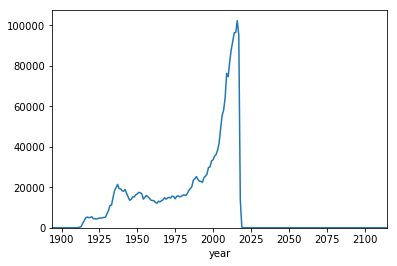

In [68]:
actorRoles = cast[cast.type == 'actor']
actorRoles.groupby(['year']).size().plot(ylim=0)

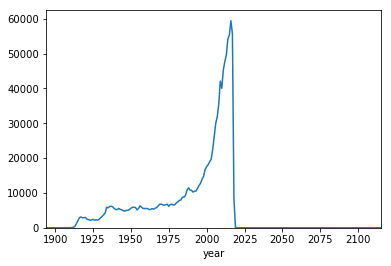

In [69]:
actorRoles = cast[cast.type == 'actress']
actorRoles.groupby(['year']).size().plot(ylim=0)

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

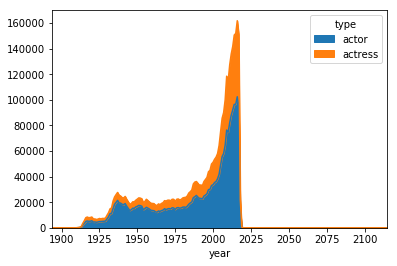

In [73]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
c.plot(kind='area',ylim=0)

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

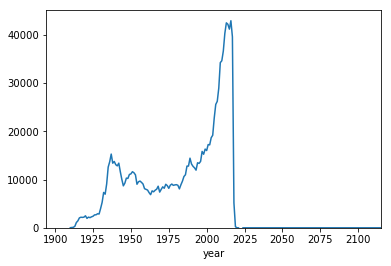

In [79]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c['actor']-c['actress']).plot(ylim=0)

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

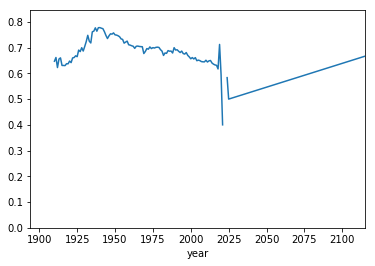

In [80]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
((c['actor'])/(c['actress']+c['actor'])).plot(ylim=0)

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

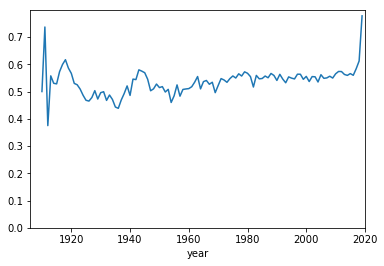

In [81]:
c = cast[cast.n == 2]
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
((c['actor'])/(c['actress']+c['actor'])).plot(ylim=0)

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

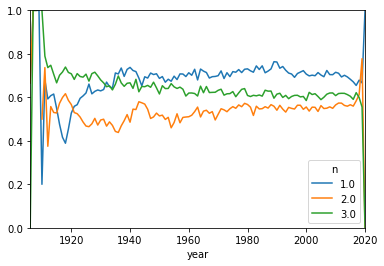

In [97]:
c = cast[cast.n < 4]
c = c.groupby(['year', 'type', 'n']).size()
c = c.unstack('type').fillna(0)
r = c.actor / (c.actor + c.actress)
r = r.unstack('n')
r.plot(ylim=[0,1])